In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/forth_revolution.csv', encoding='utf-8')
posts = df.get('Title') + " " + df.get('Description')

In [3]:
from eunjeon import Mecab
tagger = Mecab()
#불용어 발견할 때마다 추가할 예정이다.
stop_words = "4 은 이 것 등 더 를 차 수 년"
stop_words = stop_words.split(' ')
stop_words[0:10]

['4', '은', '이', '것', '등', '더', '를', '차', '수', '년']

In [4]:
#명사 추출
nouns = []
for post in posts :
    for noun in tagger.nouns(post) :
        if noun not in stop_words :
            nouns.append(noun)
nouns[0:10]

['산업', '혁명', '의료', '기술', '과목', '산업', '혁명', '정의', '무엇', '구현']

In [5]:
from collections import Counter
num_top_nouns = 20
noun_counter = Counter(nouns)
top_nouns = dict(noun_counter.most_common(num_top_nouns))
top_nouns

{'산업': 3493,
 '혁명': 3056,
 '시대': 796,
 '기술': 531,
 '미래': 298,
 '교육': 292,
 '변화': 216,
 '정보': 193,
 '인공지능': 191,
 '데이터': 171,
 '핵심': 169,
 '직업': 160,
 '우리': 157,
 '분야': 149,
 '융합': 142,
 '스마트': 138,
 '디지털': 122,
 '사회': 119,
 '인터넷': 115,
 '빅': 113}

In [6]:
!pip install wordcloud

In [7]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", 
               font_path='font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

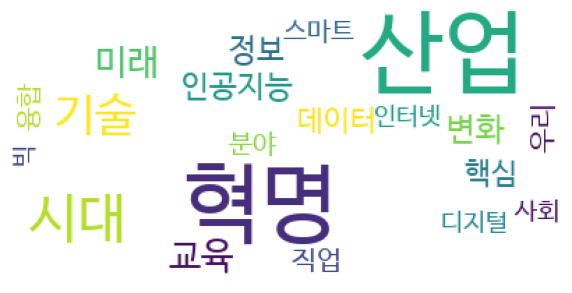

In [8]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(top_nouns)
tfidv.transform(posts).toarray()

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.57735027, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
pd.DataFrame(tfidv.transform(posts).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,1.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
1,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
2,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
3,0.000000,0.00000,0.0,0.00000,0.577350,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.57735,0.57735,0.0,0.0
4,0.500000,0.50000,0.0,0.00000,0.000000,0.0,0.5,0.0,0.5,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.948683,0.00000,0.0,0.00000,0.316228,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
996,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
997,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
998,0.000000,0.57735,0.0,0.57735,0.000000,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0
